In [4]:
gene_name_dic = {}
with open("data/merfishzhuang/hMTGE_barcode_id_to_geneName_conversion.csv") as f:
    f.readline()
    for line in f:
        entries = line.strip().split(",")
        gene_name_dic[entries[2]] = entries[0]

In [9]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]

min_xy = 79, 79

pos_dic = defaultdict(lambda: [])
with open("data/merfishzhuang/barcodes_287gene_0103_hMTG.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[4]) - min_xy[0]
        y = float(entries[5]) - min_xy[1]
        g = gene_name_dic[entries[0]]
        if "Blank-" in g:
            continue
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

barcode_id,global_x,global_y,global_z,x,y,fov,cell_index



In [10]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [11]:
minmax_x, minmax_y

([0.8226499999999959, 1889.1403], [0.5715939999999904, 1889.2216])

In [12]:
width, height = 1890, 1890

In [13]:
import ssam

In [14]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/merfishzhuang_human1", verbose=True)

In [15]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

Processing gene ABCC12...
Processing gene ABO...
Processing gene ACVR1C...
Processing gene ADAMTS3...
Processing gene ADAMTSL1...
Processing gene ADARB2...
Processing gene ADCY8...
Processing gene ADAMTS20...
Processing gene ADAMTS9...
Processing gene ADGRG6...
Processing gene AGBL4...
Processing gene ANKRD34B...
Processing gene ANO3...
Processing gene ANTXR2...
Processing gene ARHGAP31...
Processing gene ARSJ...
Processing gene ARX...
Processing gene ASIC2...
Processing gene ATP10A...
Processing gene ATRNL1...
Processing gene B3GAT2...
Processing gene BRINP3...
Processing gene BTBD11...
Processing gene C10orf11...
Processing gene C3orf58...
Processing gene CA10...
Processing gene CACNA2D1...
Processing gene CACNA2D3...
Processing gene CALB1...
Processing gene CAMK2D...
Processing gene CCDC184...
Processing gene CDH20...
Processing gene CDH6...
Processing gene CHD7...
Processing gene CHRM2...
Processing gene CHRM3...
Processing gene CHRNA4...
Processing gene CHST9...
Processing gene CL

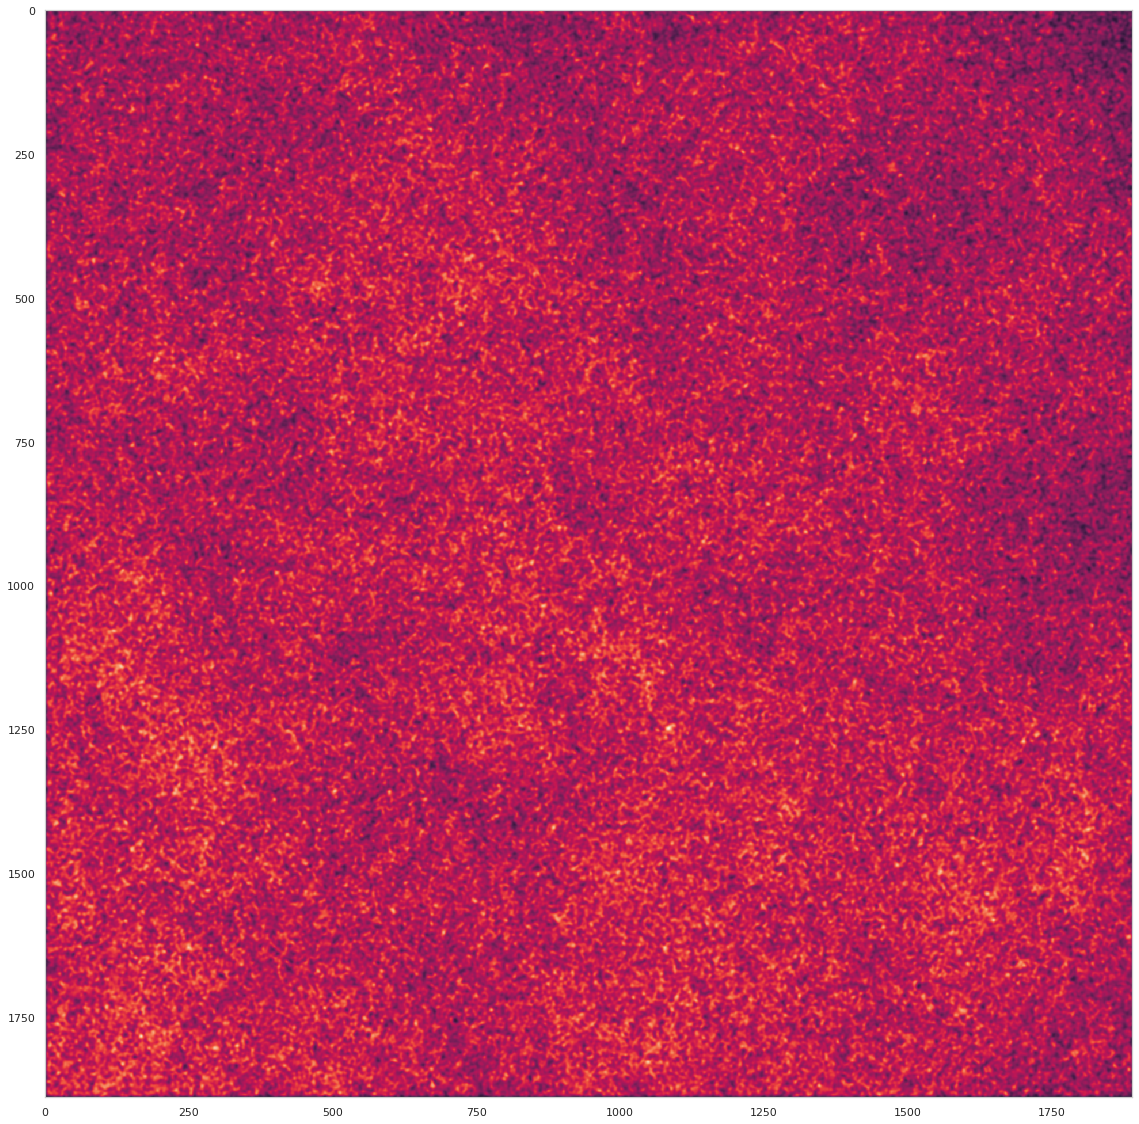

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 20])
plt.imshow(ds.vf_norm[..., 0])

In [21]:
exp_thres = 0
norm_thres = 0

In [22]:
analysis.find_localmax(search_size=3, min_expression=exp_thres, min_norm=norm_thres)

Found 25501 local max vectors.


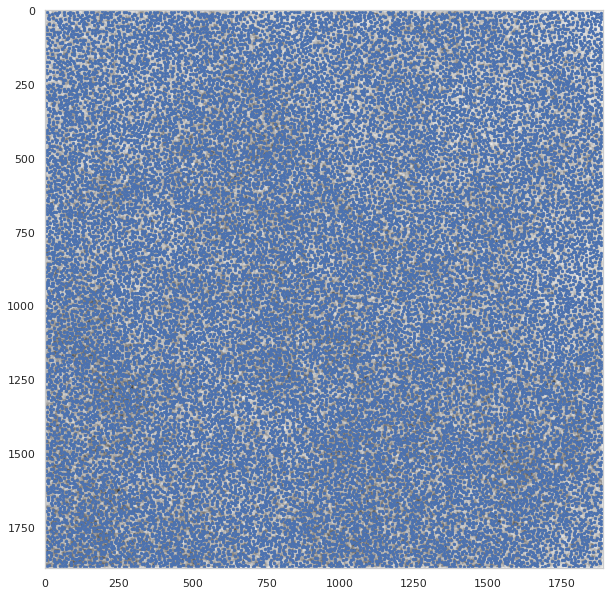

In [23]:
plt.figure(figsize=[10, 20])
ds.plot_l1norm(cmap="Greys")
ds.plot_localmax(s=5)

In [24]:
analysis.normalize_vectors_sctransform()

In [30]:
analysis.cluster_vectors(pca_dims=33, resolution=0.6, max_correlation=1.0, metric="correlation", centroid_correction_threshold=0.6)

Found 82 clusters


In [31]:
analysis.map_celltypes()

In [33]:
analysis.filter_celltypemaps(min_norm=0.1, min_r=0.3)

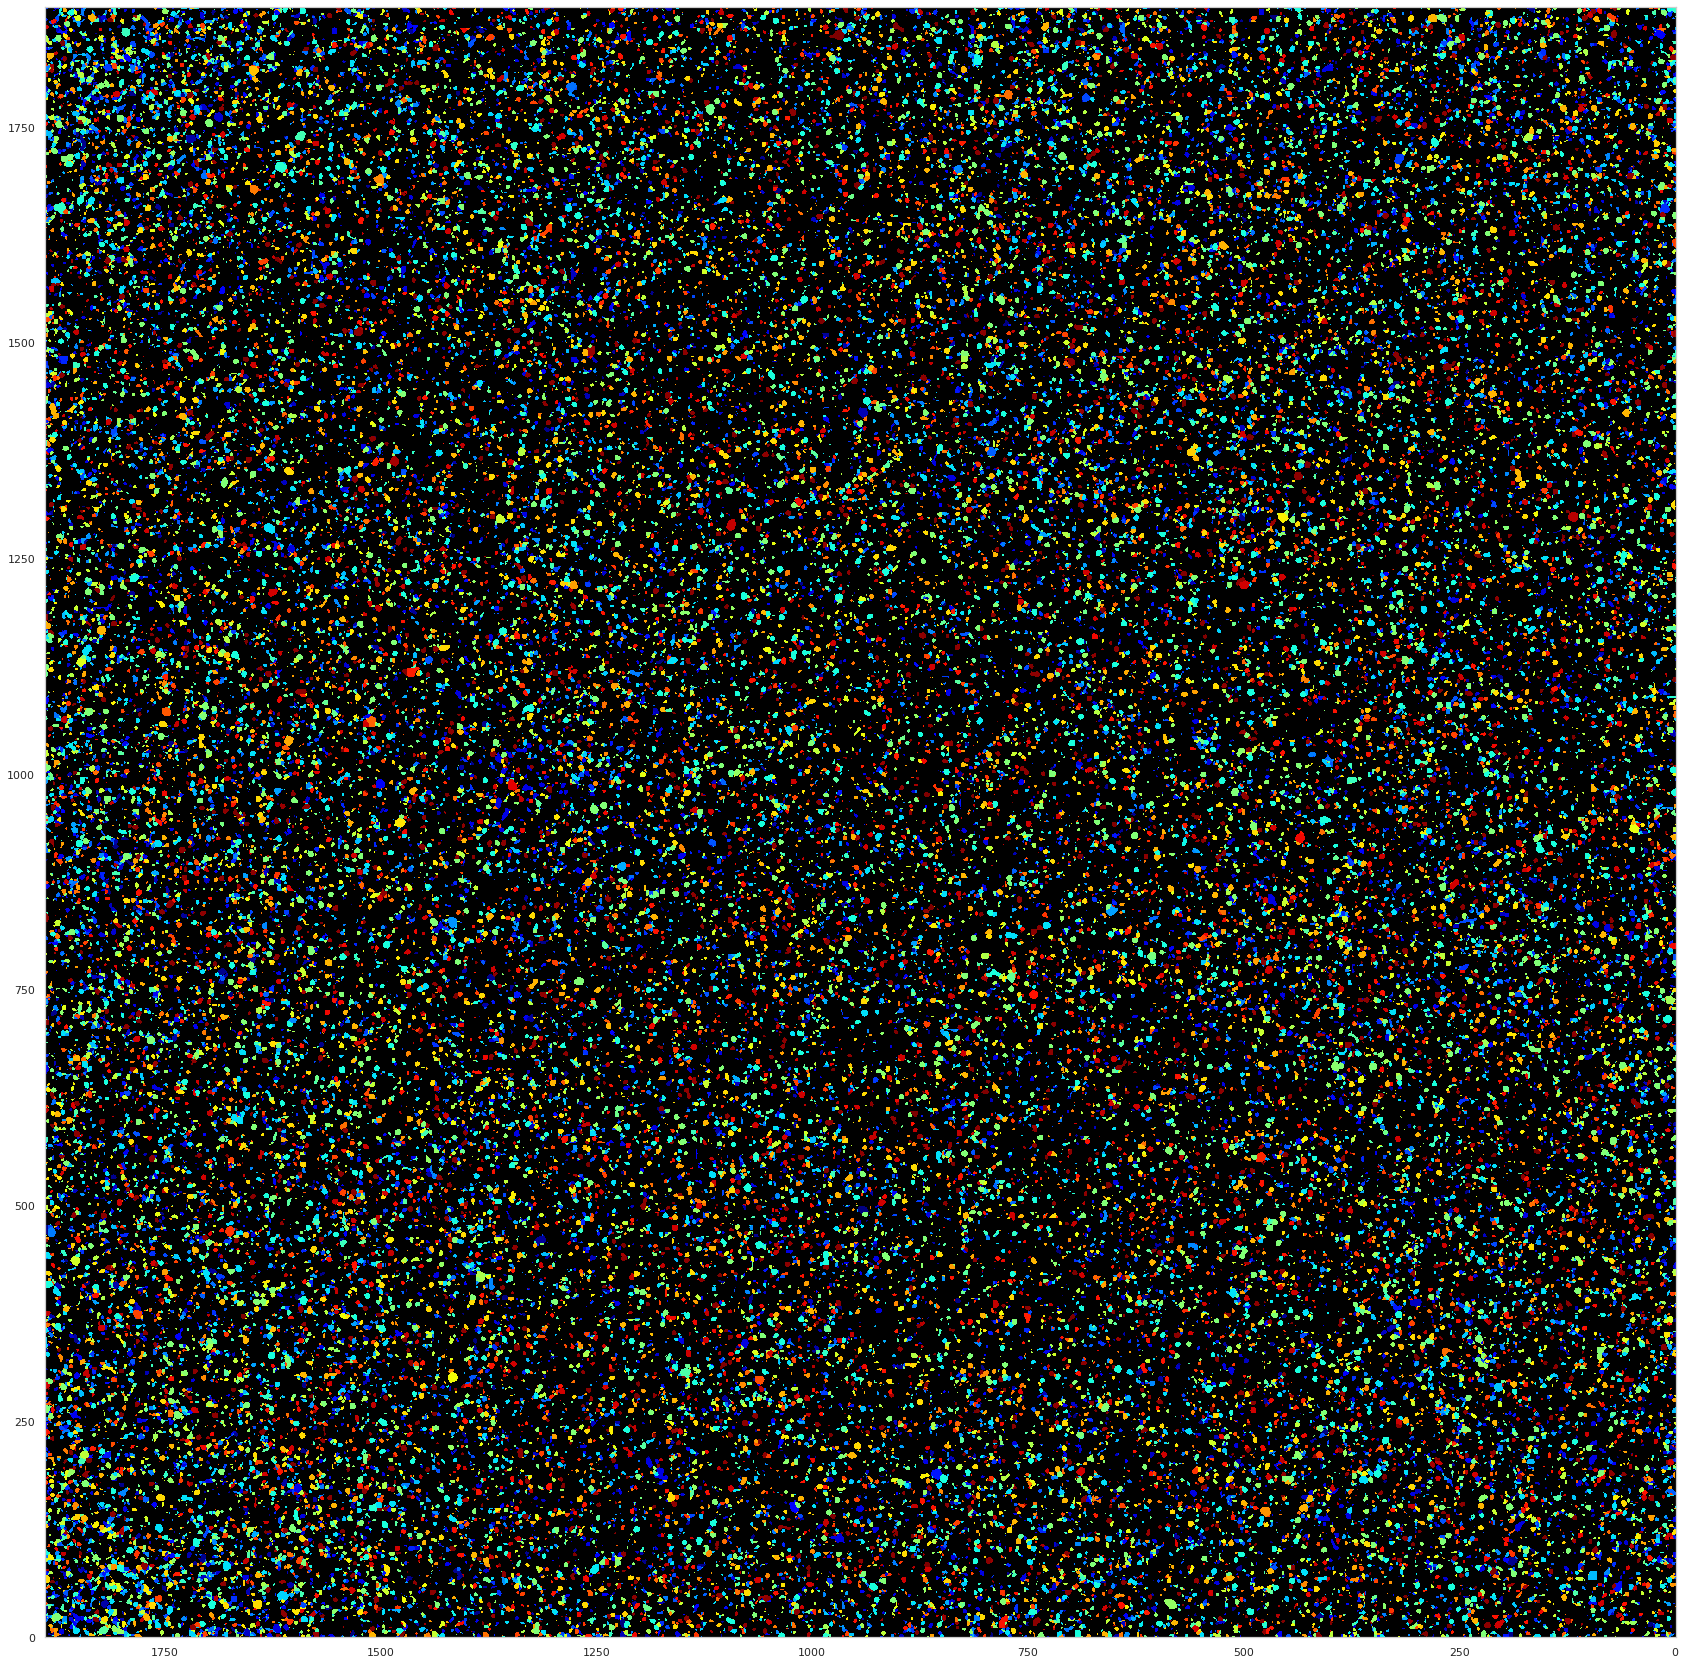

In [34]:
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=2)